# Object Detection
---

#### Resources: 


## Environment Preparation

In [1]:
# Imports
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

from glob import glob

# Import path
# Place TF Models repository on the same directory (https://github.com/tensorflow/models)
sys.path.append("../../models/research/")
sys.path.append("../../output_data/faster_rcnn_resnet101_coco_2017_11_08/")

MODELS_PATH = "../../output_data/" # trained model path
LABELS_PATH = "../../models/research/object_detection/data/" # labels path
TEST_IMGS_PATH = "../../test_images/"

ImportError: Traceback (most recent call last):
  File "/home/eric/.local/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/eric/.local/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/eric/.local/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.5/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.5/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.8.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [24]:
# Object detections imports
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## Import Models

In [25]:
# CNN Model
model_name = 'faster_rcnn_resnet101_coco_2017_11_08'
label_name = 'mscoco_label_map.pbtxt' # From TF Models repo
NUM_CLASSES = 90

In [27]:
# load label map
label_map = label_map_util.load_labelmap(os.path.join(LABELS_PATH, label_name))
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
#print(category_index)

In [28]:
# helper functions
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [30]:
# load inference
detection_graph = tf.Graph()

with detection_graph.as_default():
    
    od_graph_def = tf.GraphDef()

    with tf.gfile.GFile(os.path.join(MODELS_PATH, model_name, "frozen_inference_graph.pb"), 'rb') as fid:

        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [32]:
# load testing images
PATH_TO_TEST_IMAGES_DIR = '../../test_images/'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

../../test_images/*.png
Length of test images: 7


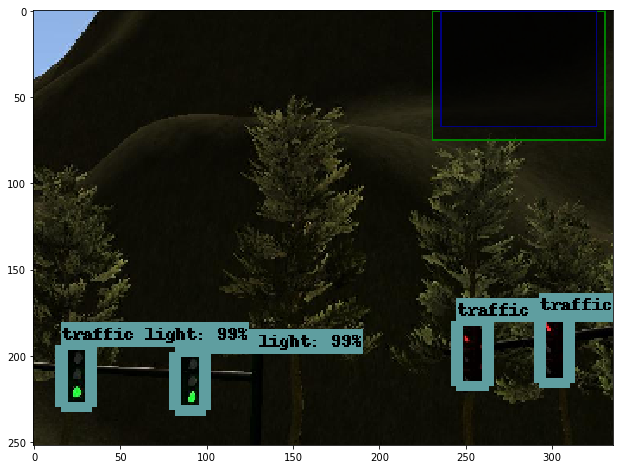

traffic light 0.993255
Distance (metres) 0.0
Time in milliseconds 22582.30495452881 

traffic light 0.990454
Distance (metres) 0.0
Time in milliseconds 22582.30495452881 

traffic light 0.9863
Distance (metres) 0.0
Time in milliseconds 22582.30495452881 

traffic light 0.982205
Distance (metres) 0.0
Time in milliseconds 22582.30495452881 



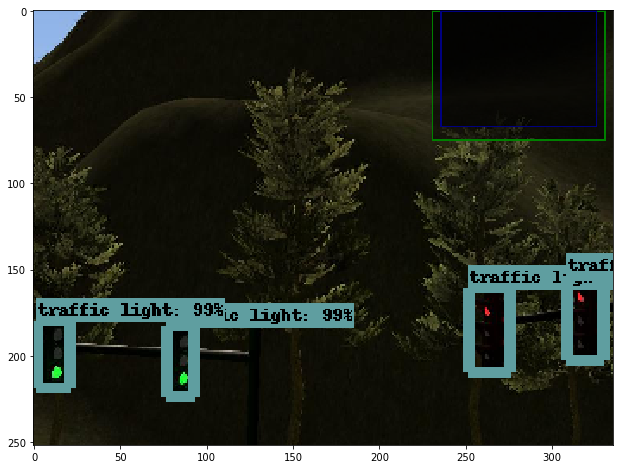

traffic light 0.993637
Distance (metres) 0.0
Time in milliseconds 15916.613817214966 

traffic light 0.993532
Distance (metres) 0.0
Time in milliseconds 15916.613817214966 

traffic light 0.9882
Distance (metres) 0.0
Time in milliseconds 15916.613817214966 

traffic light 0.98656
Distance (metres) 0.0
Time in milliseconds 15916.613817214966 



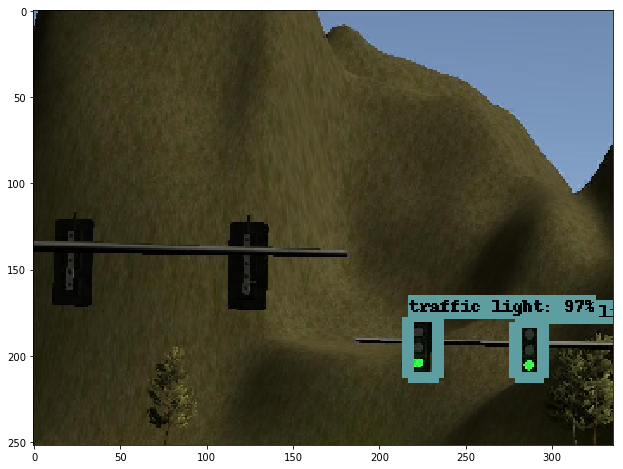

traffic light 0.991217
Distance (metres) 0.0
Time in milliseconds 14833.085060119629 

traffic light 0.978341
Distance (metres) 0.0
Time in milliseconds 14833.085060119629 



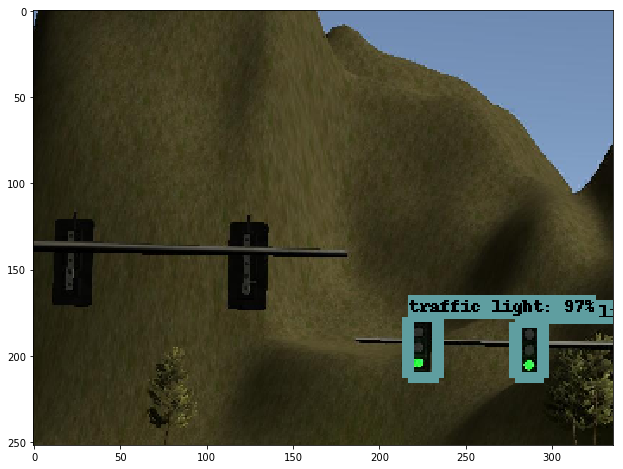

traffic light 0.991227
Distance (metres) 0.0
Time in milliseconds 14714.118957519531 

traffic light 0.978146
Distance (metres) 0.0
Time in milliseconds 14714.118957519531 



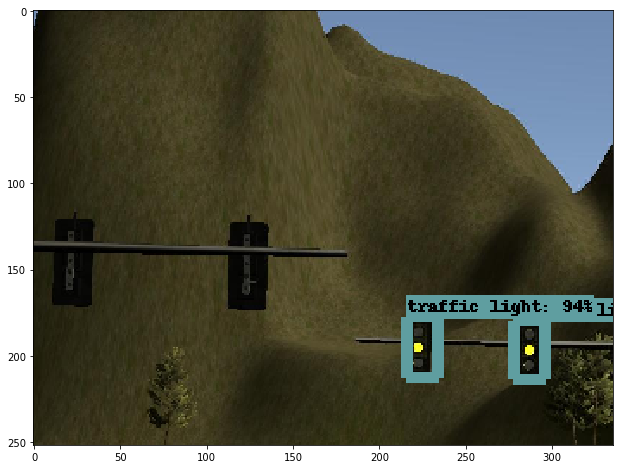

traffic light 0.99244
Distance (metres) 0.0
Time in milliseconds 14857.762098312378 

traffic light 0.946126
Distance (metres) 0.0
Time in milliseconds 14857.762098312378 



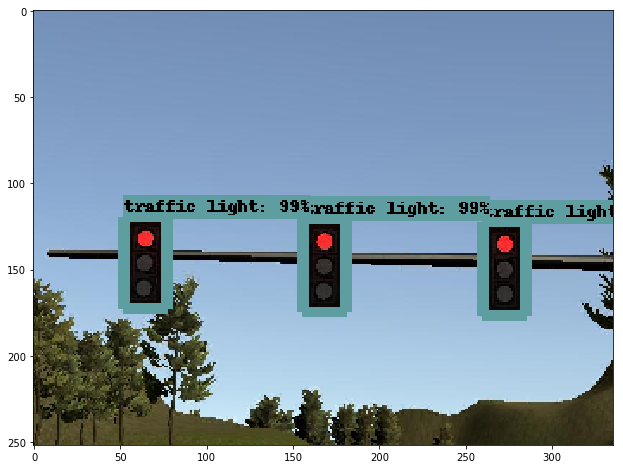

traffic light 0.998562
Distance (metres) 0.0
Time in milliseconds 15938.202857971191 

traffic light 0.998201
Distance (metres) 0.0
Time in milliseconds 15938.202857971191 

traffic light 0.997164
Distance (metres) 0.0
Time in milliseconds 15938.202857971191 



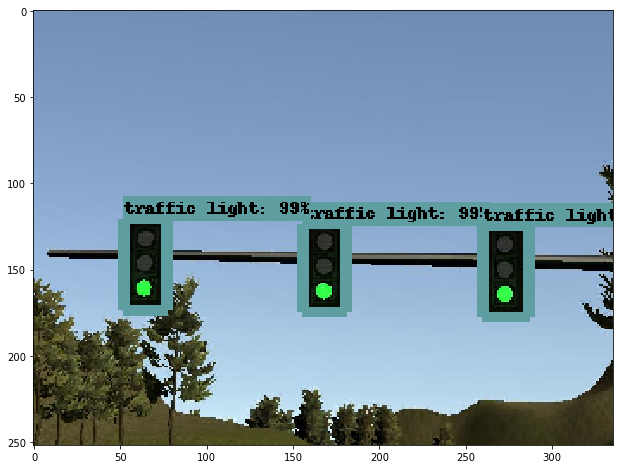

traffic light 0.998004
Distance (metres) 0.0
Time in milliseconds 17392.3978805542 

traffic light 0.997374
Distance (metres) 0.0
Time in milliseconds 17392.3978805542 

traffic light 0.997302
Distance (metres) 0.0
Time in milliseconds 17392.3978805542 



In [33]:
# Run object detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .80
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n") 